## What are Decision Trees?

<img width="60%" class="imgright" src="../images/decision_trees.webp" srcset="../images/decision_trees_800w.webp 800w,../images/decision_trees_700w.webp 700w,../images/decision_trees_600w.webp 600w,../images/decision_trees_500w.webp 500w,../images/decision_trees_400w.webp 400w,../images/decision_trees_350w.webp 350w,../images/decision_trees_300w.webp 300w" alt="Decision Tree">

Decision trees are supervised learning algorithms used for both, classification and regression tasks where we will concentrate on classification in this first part of our decision tree tutorial.<br> 
Decision trees are assigned to the information based learning algorithms which use different measures of information gain for learning. We can use decision trees for issues where we have continuous but also categorical input and target features.
The main idea of decision trees is to find those descriptive features which contain the most "information" regarding the target feature and then split the dataset along the values of these features such that the target feature values for the resulting sub_datasets are as pure as possible --> The descriptive feature which leaves the target feature most purely is said to be the most informative one. This process of finding the "most informative" feature is done until we accomplish a stopping criteria where we then finally end up in so called **leaf nodes**. The leaf nodes contain the predictions we will make for new query instances presented to our trained model. This is possible since the model has kind of learned the underlying structure of the training data and hence can, given some assumptions, make predictions about the target feature value (class) of unseen query instances.<br>
A decision tree mainly contains of a **root node**, **interior nodes**, and **leaf nodes** which are then connected by **branches**.

<img width=90% src="../images/Decision_Tree1.webp" srcset="../images/Decision_Tree1_800w.webp 800w,../images/Decision_Tree1_700w.webp 700w,../images/Decision_Tree1_600w.webp 600w,../images/Decision_Tree1_500w.webp 500w,../images/Decision_Tree1_400w.webp 400w,../images/Decision_Tree1_350w.webp 350w,../images/Decision_Tree1_300w.webp 300w" alt="Structure of a Decision Tree">
<br>
<br>

Decision trees are further subdivided whether the target feature is continuously scaled like for instance house prices or categorically scaled like for instance animal species.
<br>
<br> 
<img width=90% src="../images/Categorical_Continuous_Scales.webp" srcset="../images/Categorical_Continuous_Scales_800w.webp 800w,../images/Categorical_Continuous_Scales_700w.webp 700w,../images/Categorical_Continuous_Scales_600w.webp 600w,../images/Categorical_Continuous_Scales_500w.webp 500w,../images/Categorical_Continuous_Scales_400w.webp 400w,../images/Categorical_Continuous_Scales_350w.webp 350w,../images/Categorical_Continuous_Scales_300w.webp 300w" alt="Continuous and Categorically scaled data">
<br>
<br>

In simplified terms, the process of training a decision tree and predicting the target features of query instances is as follows:

**1. Present a dataset containing of a number of training instances characterized by a number of descriptive features and a target feature**

**2. Train the decision tree model by continuously splitting the target feature along the values of the descriptive features using a measure of information gain during the training process**

**3. Grow the tree until we accomplish a stopping criteria --> create leaf nodes which represent the *predictions* we want to make for new query instances**

**4. Show query instances to the tree and run down the tree until we arrive at leaf nodes**

**5. DONE - Congratulations you have found the answers to your questions**

<img width=90% src="../images/Train_Predict_simplified.webp" srcset="../images/Train_Predict_simplified_800w.webp 800w,../images/Train_Predict_simplified_700w.webp 700w,../images/Train_Predict_simplified_600w.webp 600w,../images/Train_Predict_simplified_500w.webp 500w,../images/Train_Predict_simplified_400w.webp 400w,../images/Train_Predict_simplified_350w.webp 350w,../images/Train_Predict_simplified_300w.webp 300w" alt="Decision Tree training and predicting procedure">
<br>
<br>
<br>

**So what do we know until know?**<br>
In principal decision trees can be used to predict the target feature of a unknown query instance by building a model based on existing data for which the target feature values are known (supervised learning). Additionally, we know that this model can make predictions for unknown query instances because it models the relationship between the known descriptive features and the know target feature. In our following example, the tree model learns "how a specific animal species looks like" respectively the combination of descriptive feature values distinctive for animal species.<br> 
Additionally, we know that to train a decision tree model we need a dataset consisting of a number of training examples characterized by a number of descriptive features and a target feature.<br>
<img width="60%" class="imgright" src="../images/Features_Target_Feature.webp" srcset="../images/Features_Target_Feature_800w.webp 800w,../images/Features_Target_Feature_700w.webp 700w,../images/Features_Target_Feature_600w.webp 600w,../images/Features_Target_Feature_500w.webp 500w,../images/Features_Target_Feature_400w.webp 400w,../images/Features_Target_Feature_350w.webp 350w,../images/Features_Target_Feature_300w.webp 300w" alt="Drawing">
**What we do not know until know is: How we can build a tree model.**
To answer that question  we should recapitulate what we try to achieve using a decision tree model. *We want, given a dataset, train a model which kind of learns the relationship between the descriptive features and a target feature such that we can present the model a new, unseen set of query instances and predict the target feature values for these query instances*. Lets further recapitulate the general shape of a decision tree. We know that we have at the bottom of the tree leaf nodes which contain (in the optimal case) target feature values. To make this more illustrative we use as a practical example a simplified version of the UCI machine learning Zoo Animal Classification dataset which includes properties of animals as *descriptive features*  and the and the animal species as *target feature*. In our example the animals are classified as being Mammals or Reptiles based on whether they are toothed, have legs and do breath. 
The dataset looks like:  

In [6]:
import pandas as pd

data = pd.DataFrame({"toothed":["True","True","True","False","True","True","True","True","True","False"],
                     "hair":["True","True","False","True","True","True","False","False","True","False"],
                     "breathes":["True","True","True","True","True","True","False","True","True","True"],
                     "legs":["True","True","False","True","True","True","False","False","True","True"],
                     "species":["Mammal","Mammal","Reptile","Mammal","Mammal","Mammal","Reptile","Reptile","Mammal","Reptile"]}, 
                    columns=["toothed","hair","breathes","legs","species"])

features = data[["toothed","hair","breathes","legs"]]
target = data["species"]

data



,toothed,hair,breathes,legs,species
0,True,True,True,True,Mammal
1,True,True,True,True,Mammal
2,True,False,True,False,Reptile
3,False,True,True,True,Mammal
4,True,True,True,True,Mammal
5,True,True,True,True,Mammal
6,True,False,False,False,Reptile
7,True,False,True,False,Reptile
8,True,True,True,True,Mammal
9,False,False,True,True,Reptile


<br>
Hence, to come back to our initial question, each leaf node should (in the best case) only contain "Mammals" or "Reptiles". The task for us is now to find the best "way" to split the dataset such that this can be achieved. What do I mean when I say *split*? Well consider the dataset above and think about what must be done to split the dataset into a Dataset 1 containing as target feature values (species) only Mammals and a Dataset 2, containing only Reptiles. To achieve that, in this simplified example, we only need the descriptive feature *hair* since if hair is TRUE, the associated species is always a Mammal. Hence in this case our tree model would look like:
<br>
<br>

<img width=90% src="../images/Reptile_Mammal_distinction.webp" srcset="../images/Reptile_Mammal_distinction_800w.webp 800w,../images/Reptile_Mammal_distinction_700w.webp 700w,../images/Reptile_Mammal_distinction_600w.webp 600w,../images/Reptile_Mammal_distinction_500w.webp 500w,../images/Reptile_Mammal_distinction_400w.webp 400w,../images/Reptile_Mammal_distinction_350w.webp 350w,../images/Reptile_Mammal_distinction_300w.webp 300w" alt="Decision Trees splitting procedure">
<br>
<br>

That is, we have split our dataset by asking the question if the animal has hair or not. And exactly this asking and therewith splitting is the key to the decision tree models. Now in that case the splitting has been very easy because we only have a small number of descriptive features and the dataset is completely separable along the values of only one descriptive feature. However, most of the time datasets are not that easily separable and we must split the dataset more than one time ("ask more than one question"). Here, the next question directly arises: *Given that we have to split the dataset more than one time, that is, ask more then one question to separate the dataset, Which is the descriptive feature we should start with (root node) and in which order should we ask questions (build the interior nodes) that is, use descriptive features to split the dataset on?* Well, we have seen that using the *hair* descriptive feature seems to occupy the most information about the target feature since we only need this feature to perfectly split the dataset. Hence it would be useful to measure the "informativeness" of the features and use the feature with the most "informativeness" as the feature which should be used to split the data on. From now on, we use the term **information gain** as a measure of "informativeness" of a feature. In the following section we will introduce some mathematical terms and derive how the information gain is calculated as well as how we can build a tree model based on that.
<br>

### The Maths Behind Decision Trees

In the preceding section we have introduced the information gain as a measure of how good a descriptive feature is suited to split a dataset on. To be able to calculate the information gain, we have to first introduce the term *entropy* of a dataset. The entropy of a dataset is used to measure the impurity of a dataset and we will use this kind of informativeness measure in our calculations. There are also other types of measures which can be used to calculate the information gain. The most prominent ones are the: *Gini Index, Chi-Square, Information gain ratio, Variance*. The term entropy (in information theory) goes back to Claude E. Shannon. The idea behind the entropy is, in simplified terms, the following: Imagine you have a lottery wheel which includes 100 green balls. The set of balls within the lottery wheel can be said to be totally pure because only green balls are included. To express this in the terminology of entropy, this set of balls has a entropy of 0 (we can also say zero impurity). Consider now, 30 of these balls are replaced by red and 20 by blue balls. 
<br>
<br>

<img width=90% src="../images/Shannons_Entropy_Impurity.webp" srcset="../images/Shannons_Entropy_Impurity_600w.webp 600w,../images/Shannons_Entropy_Impurity_500w.webp 500w,../images/Shannons_Entropy_Impurity_400w.webp 400w,../images/Shannons_Entropy_Impurity_350w.webp 350w,../images/Shannons_Entropy_Impurity_300w.webp 300w" alt="Pure and impure datasets">

<br>
<br>
If you now draw another ball from the lottery wheel, the probability of receiving a green ball has dropped from 1.0 to 0.5. Since the impurity increased, the purity decreased, hence also the entropy increased. Hence we can say, the more "impure" a dataset, the higher the entropy and the less "impure" a dataset, the lower the entropy. Shannon's entropy model uses the logarithm function ($log_{2}(P(x))$) to measure the entropy and therewith the impurity of a dataset since the higher the probability of getting a specific result == P(x) (randomly drawing a green ball), the closer approaches the binary logarithm 1. 
<br>

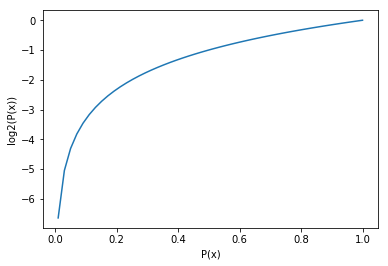

In [7]:
import numpy as np
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(np.linspace(0.01,1),np.log2(np.linspace(0.01,1)))
ax.set_xlabel("P(x)")
ax.set_ylabel("log2(P(x))")

plt.show()


Once a dataset contains more than one "type" of elements specifically more than one target feature value, the impurity will be greater than zero. Therewith also the entropy of the dataset will be greater than zero. Hence it is useful to sum up the entropies of each possible target feature value and weight it by the probability that we achieve these values assuming we would randomly draw values from the target feature value space (What is the probability to draw a green ball just by chance? Exactly, 0.5 and therewith we have to weight the entropy calculated for the green balls with 0.5). This finally leads to the formal definition of Shannon's entropy which serves as the baseline for the information gain calculation:
<br>

$$H(x) = -\sum_{for \ k \ \in target}(P(x=k)*log_2(P(x=k)))$$
<br>
where we say that P(x=k) is the probability, that the target feature takes a specific value k. Hence applying this formula to our example with the three colored balls we get:

**Green balls:** $H(x=green) = 0.5*log_2(0.5) = -0.5$ <br>
**Blue balls:** $H(x=blue) = 0.2*log_2(0.2) = -0.464$ <br>
**Red balls:** $H(x=red) = 0.3*log_2(0.3) = -0.521$ <br>

**H(x):** $H(x) = -((-0.5)+(-0.464)+(-0.521)) = 1.485$

Lets apply this approach to our original dataset where we want to predict the animal species. Our dataset has two target feature values in its target feature value space {Mammal, Reptile}. Where $P(x=Mammal) = 0.6$  and $P(x=Reptile) = 0.4$ Hence the entropy of our dataset regarding the target feature is calculated with:

$H(x) = -((0.6*log_2(0.6))+(0.4*log_2(0.4))) = 0.971$

**So where are we now on our way towards creating a tree model?**<br>
We have now determined the total impurity/purity ($\approx$ entropy) of our dataset which equals to approximately $0.971$. Now our task is to find the best feature in terms of information gain (Remember that we want to find the feature which splits the data most accurate along the target feature values) which we should use to first split our data on (which serves as root node). Remember that the *hair* feature is no longer part of our feature set.<br>
Following this, how can we check which of the descriptive features most accurately splits the dataset, that is, remains the dataset with the lowest impurity $\approx$ entropy or in other words best classifies the target features by its own? Well, we use each descriptive feature and split the dataset along the values of these descriptive feature and then calculate the entropy of the dataset once we have split the data along the feature values. This gives us the remaining entropy after we have split the dataset along the feature values. Next, we subtract this value from the originally calculated entropy of the dataset to see how much this feature splitting reduces the original entropy. The information gain of a feature is calculated with:<br>

$$InfoGain(feature_{d}) = Entropy(D)-Entropy(feature_{d})$$<br>
So the only thing we have to do is to split the dataset along the values of each feature and then treat these sub sets as if they were our "original" dataset in terms of entropy calculation. The formula for the Information Gain calculation per feature is:
    

$$InforGain(feature_{d},D) = Entropy(D)-\sum_{t \ \in \ feature}(\frac{|feature_{d} = t|}{|D|}*H(feature_{d} = t))$$<br>
$$ = $$
$$Entropy(D)-\sum_{t \ \in \ feature}(\frac{|feature_{d} = t|}{|D|}*(-\sum_{k \ \in \ target}(P(target=k,feature_{d} = t)*log_{2}(P(target = k,feature_{d} = t))))$$<br>

Summarized, for each descriptive feature, we sum up the resulting entropies for splitting the dataset along the feature values and additionally weight the feature value entropies by their occurrence probability.
<br>
<br>

<img width=90% src="../images/Information_Gain_Calculation.webp" srcset="../images/Information_Gain_Calculation_800w.webp 800w,../images/Information_Gain_Calculation_700w.webp 700w,../images/Information_Gain_Calculation_600w.webp 600w,../images/Information_Gain_Calculation_500w.webp 500w,../images/Information_Gain_Calculation_400w.webp 400w,../images/Information_Gain_Calculation_350w.webp 350w,../images/Information_Gain_Calculation_300w.webp 300w" alt="Information Gain calculation">
<br>
<br>

<br>
**Now we will calcuate the Information gain for each descriptive feature:**
<br>

**toothed:**<br>

<img src="../images/Entropy_Calculation_of_the_toothed_feature.webp" alt="Drawing" style="width: 95% ; float: center"/>$ = $ **0.963547**<br>

$InfoGain(toothed) = 0.971-0.963547 =$ **0.00745**<br>


**breathes:**<br>

$H(breathes)=(\frac{9}{10}*-((\frac{6}{9}*log_2(\frac{6}{9}))+(\frac{3}{9}*log_2(\frac{3}{9})))+\frac{1}{10}*-((0)+(1*log_2(1))))$ = **0.82647**<br>

$InfoGain(breathes) = 0.971-0.82647 =$ **0.1445**<br>

**legs:**<br>

$H(legs) = \frac{7}{10} * -((\frac{6}{7}*log_2(\frac{6}{7}))+(\frac{1}{7}*log_2(\frac{1}{7}))) + \frac{3}{10} * -((0)+(1*log_2(1))) = $**0.41417**<br>

$InfoGain(legs) = 0.971-0.41417 =$ **0.5568**<br>


Hence the splitting the dataset along the feature *legs* results in the largest information gain and we should use this feature for our root node.<br>
Hence for the time being the decision tree model looks like:
<br>
<br>

<img width=90% src="../images/Root_Node_Split.webp" srcset="../images/Root_Node_Split_800w.webp 800w,../images/Root_Node_Split_700w.webp 700w,../images/Root_Node_Split_600w.webp 600w,../images/Root_Node_Split_500w.webp 500w,../images/Root_Node_Split_400w.webp 400w,../images/Root_Node_Split_350w.webp 350w,../images/Root_Node_Split_300w.webp 300w" alt="Root Node Split Procedure">
<br>
<br>

We see that for legs == False, the target feature values of the remaining dataset are all *Reptile* and hence we set this as leaf node because we have a pure dataset (Further splitting the dataset on any of the remaining two features would not lead to a different or more accurate result since whatever we do after this point, the prediction will remain *Reptile*).
Additionally, you see that the feature *legs* is no longer included in the remaining datasets. Because we already has used this (categorical) feature to split the dataset on it must not be further used.

Until now we have found the feature for the root node as well as a leaf node for *legs == False*. The same steps for information gain calculation must now be accomplished also for the remaining dataset for *legs == True* since here we still have a mixture of different target feature values. Hence:

**Information gain calculation for the features *toothed* and *breathes* for the remaining dataset *legs == True*: **<br>

**Entropy of the (new) sub data set after first split:**<br>

$H(D) = -((\frac{6}{7}*log_2(\frac{6}{7}))+(\frac{1}{7}*log_2(\frac{1}{7}))) =$ **0.5917**<br>



**toothed:**<br>

$H(toothed) = \frac{5}{7}*-((1*log_2(1))+(0))+\frac{2}{7}*-((\frac{1}{2}*log_2(\frac{1}{2}))+(\frac{1}{2}*log_2(\frac{1}{2}))) =$ **0.285**<br>

$InfoGain(toothed) = 0.5917-0.285 =$ **0.3067**<br>


**breathes:**<br>

$H(breathes) =$ $\frac{7}{7}*-((\frac{6}{7}*log_2(\frac{6}{7}))+(\frac{1}{7}*log_2(\frac{1}{7})))+0 =$ **5917**<br>

$InfoGain(toothed) =$ $0.5917-0.5917 =$ **0**<br>

The dataset for toothed == False still contains a mixture of different target feature values why we proceed partitioning on the last left feature (== breathes)<br>
<br>
<br>
**Hence the completely grown tree looks like:**
<br>
<br>

<img width=90% src="../images/Decision_Tree_Completed.webp" srcset="../images/Decision_Tree_Completed_800w.webp 800w,../images/Decision_Tree_Completed_700w.webp 700w,../images/Decision_Tree_Completed_600w.webp 600w,../images/Decision_Tree_Completed_500w.webp 500w,../images/Decision_Tree_Completed_400w.webp 400w,../images/Decision_Tree_Completed_350w.webp 350w,../images/Decision_Tree_Completed_300w.webp 300w" alt="Completed Decision Tree">
<br>
<br>

Mind the last split (node) where the dataset got split on the *breathes feature*. Here the breathes feature solely contains data where breaths == True. Hence for breathes == False there are no instances in the dataset and therewith there is no *sub-Dataset* which can be built. In that case we return the most frequently occurring target feature value in the original dataset which is *Mammal*. This is an example how our tree model generalizes behind the training data.<br>
If we consider the other branch, that is *breathes == True* we know, that after splitting the Dataset on the values of a specific feature (breathes {True,False}) in our case, the feature must be removed. Well, that leads to a dataset where no more features are available to further split the dataset on. Hence we stop growing the tree and return the mode value of the direct parent node which is "Mammal".
<br>
<br>

That leads us to the introduction of the ID3 algorithm which is a popular algorithm to grow decision trees, published by Ross Quinlan in 1986. Besides the ID3 algorithm there are also other popular algorithms like the C4.5, the C5.0 and the CART  algorithm which we will not further consider here. Before we introduce the ID3 algorithm lets quickly come back to the stopping criteria of the above grown tree. We can define a nearly arbitrarily large number of stopping criteria. Assume for instance, we say a tree is allowed to grow for only 2 seconds and then the growing process should stop - Well that would be a stopping criteria - Nonetheless, there are mainly three useful cases in which we stop the tree from growing assuming we do not stop it beforehand by defining for instance a maximum tree depth or a minimum information gain value.
We stop the tree from growing when:<br>
**1. All rows in the target feature have the same value **<br>
**2. The dataset can be no longer split since there are no more features left**<br>
**3. The dataset can no longer be split since there are no more rows left / There is no data left**<br>

By definition, we say that if the growing gets stopped because of stopping criteria two, the leaf node should predict the most frequently occurring target feature value of the superior (parent) node. If the growing gets stopped because of the third stopping criteria, we assign the leaf node the mode target feature value of the original dataset.


**Attention, we now introduce the ID3 algorithm:**<br>

The pseudocode for the ID3 Algorithm is based on the pseudocode illustation of (Mitchell, 1997). <br>


    ID3(D,Feature_Attributes,Target_Attributes)

        Create a root node r

        Set r to the mode target feature value in D

        If all target feature values are the same:
            return r

        Else:
            pass

        If Feature_Attributes is empty:
            return r

        Else:
            Att = Attribute from Feature_Attributes with the largest information gain value
            r = Att

            For values in Att:
                Add a new node below r where node_values = (Att == values)
                Sub_D_values = (Att == values)

                If Sub_D_values == empty:
                    Add a leaf node l where l equals the mode target value in D
                Else:
                    add Sub_Tree with ID3(Sub_D_values,Feature_Attributes = Feature_Attributes without Att, Target_Attributes)
                
           

Well this pseudocode is probably a little bit confusing if you are new to decision trees and you don't have a mental picture of a decision tree on your mind. Therefore we will illustrate this pseudocode in pictures to make things a little bit more clear -hopefully-.
<br>
<br>

<img width=90% src="../images/ID3_Pseudocode_illstration.webp" srcset="../images/ID3_Pseudocode_illstration_800w.webp 800w,../images/ID3_Pseudocode_illstration_700w.webp 700w,../images/ID3_Pseudocode_illstration_600w.webp 600w,../images/ID3_Pseudocode_illstration_500w.webp 500w,../images/ID3_Pseudocode_illstration_400w.webp 400w,../images/ID3_Pseudocode_illstration_350w.webp 350w,../images/ID3_Pseudocode_illstration_300w.webp 300w" alt="Decision Tree pseudocode illustration">
<br>

### Classification Decision trees from scratch with Python

Since we now know the principal steps of the ID3 algorithm, we will start create our own decision tree classification model from scratch in *Python*.<br>

Therefore we will use the whole [*UCI Zoo Data Set*](http://archive.ics.uci.edu/ml/datasets/zoo).<br>
This dataset consists of 101 rows and 17 categorically valued attributes defining whether an animal has a specific property or not (e.g.hairs, feathers,..). The first attribute represents the name of the animal and will be removed. The target feature consist of 7 integer values [1 to 7] which represents [1:Mammal, 2:Bird, 3:Reptile, 4:Fish, 5:Amphibian, 6:Bug, 7:Invertebrate]

Though, before we finally start building the decision tree, I want to note a few things:<br>
The intention of the following code is not to create a highly efficient and robust implementation of a ID3 decision tree. For this purpose bright heads have created the prepackaged sklearn decision tree model which we will use in the next section.<br> 
With the following code I want to to provide and show the basic principle and steps behind creating a decision tree from scratch with the goal that we can use the prepackaged modules more efficiently because we understand and know what they are doing and can eventually, build our own machine learning model.<br>
That said, there are four important steps:<br>
1. The calculation of the Information Gain<br>
2. The recursive call of the TreeModel<br>
3. The building of the actual tree structure<br>
4. The species prediction of a new unseen animal-instance<br>

Here the most critical aspects are the recursive call of the TreeModel, the creation of the tree itself (building the tree structure) as well as the prediction of a unseen query instance (the process of wandering down the tree to predict the class of a unseen query instance).<br><br>

In [8]:
"""
Make the imports of python packages needed
"""
import pandas as pd
import numpy as np
from pprint import pprint



#Import the dataset and define the feature as well as the target datasets / columns#
dataset = pd.read_csv('data/zoo.csv',
                      names=['animal_name','hair','feathers','eggs','milk',
                                                   'airbone','aquatic','predator','toothed','backbone',
                                                  'breathes','venomous','fins','legs','tail','domestic','catsize','class',])#Import all columns omitting the fist which consists the names of the animals



#We drop the animal names since this is not a good feature to split the data on
dataset=dataset.drop('animal_name',axis=1)


###################



def entropy(target_col):
    """
    Calculate the entropy of a dataset.
    The only parameter of this function is the target_col parameter which specifies the target column
    """
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy


################### 
    
###################


def InfoGain(data,split_attribute_name,target_name="class"):
    """
    Calculate the information gain of a dataset. This function takes three parameters:
    1. data = The dataset for whose feature the IG should be calculated
    2. split_attribute_name = the name of the feature for which the information gain should be calculated
    3. target_name = the name of the target feature. The default for this example is "class"
    """    
    #Calculate the entropy of the total dataset
    total_entropy = entropy(data[target_name])
    
    ##Calculate the entropy of the dataset
    
    #Calculate the values and the corresponding counts for the split attribute 
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    
    #Calculate the weighted entropy
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    
    #Calculate the information gain
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain
       
###################

###################


def ID3(data,originaldata,features,target_attribute_name="class",parent_node_class = None):
    """
    ID3 Algorithm: This function takes five paramters:
    1. data = the data for which the ID3 algorithm should be run --> In the first run this equals the total dataset
 
    2. originaldata = This is the original dataset needed to calculate the mode target feature value of the original dataset
    in the case the dataset delivered by the first parameter is empty

    3. features = the feature space of the dataset . This is needed for the recursive call since during the tree growing process
    we have to remove features from our dataset --> Splitting at each node

    4. target_attribute_name = the name of the target attribute

    5. parent_node_class = This is the value or class of the mode target feature value of the parent node for a specific node. This is 
    also needed for the recursive call since if the splitting leads to a situation that there are no more features left in the feature
    space, we want to return the mode target feature value of the direct parent node.
    """   
    #Define the stopping criteria --> If one of this is satisfied, we want to return a leaf node#
    
    #If all target_values have the same value, return this value
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    
    #If the dataset is empty, return the mode target feature value in the original dataset
    elif len(data)==0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name],return_counts=True)[1])]
    
    #If the feature space is empty, return the mode target feature value of the direct parent node --> Note that
    #the direct parent node is that node which has called the current run of the ID3 algorithm and hence
    #the mode target feature value is stored in the parent_node_class variable.
    
    elif len(features) ==0:
        return parent_node_class
    
    #If none of the above holds true, grow the tree!
    
    else:
        #Set the default value for this node --> The mode target feature value of the current node
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],return_counts=True)[1])]
        
        #Select the feature which best splits the dataset
        item_values = [InfoGain(data,feature,target_attribute_name) for feature in features] #Return the information gain values for the features in the dataset
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        
        #Create the tree structure. The root gets the name of the feature (best_feature) with the maximum information
        #gain in the first run
        tree = {best_feature:{}}
        
        
        #Remove the feature with the best inforamtion gain from the feature space
        features = [i for i in features if i != best_feature]
        
        #Grow a branch under the root node for each possible value of the root node feature
        
        for value in np.unique(data[best_feature]):
            value = value
            #Split the dataset along the value of the feature with the largest information gain and therwith create sub_datasets
            sub_data = data.where(data[best_feature] == value).dropna()
            
            #Call the ID3 algorithm for each of those sub_datasets with the new parameters --> Here the recursion comes in!
            subtree = ID3(sub_data,dataset,features,target_attribute_name,parent_node_class)
            
            #Add the sub tree, grown from the sub_dataset to the tree under the root node
            tree[best_feature][value] = subtree
            
        return(tree)    
                
###################

###################


    
    
def predict(query,tree,default = 1):
    """
    Prediction of a new/unseen query instance. This takes two parameters:
    1. The query instance as a dictionary of the shape {"feature_name":feature_value,...}

    2. The tree 


    We do this also in a recursive manner. That is, we wander down the tree and check if we have reached a leaf or if we are still in a sub tree. 
    Since this is a important step to understand, the single steps are extensively commented below.

    1.Check for every feature in the query instance if this feature is existing in the tree.keys() for the first call, 
    tree.keys() only contains the value for the root node 
    --> if this value is not existing, we can not make a prediction and have to 
    return the default value which is the majority value of the target feature

    2. First of all we have to take care of a important fact: Since we train our model with a database A and then show our model
    a unseen query it may happen that the feature values of these query are not existing in our tree model because non of the
    training instances has had such a value for this specific feature. 
    For instance imagine the situation where your model has only seen animals with one to four
    legs - The "legs" node in your model will only have four outgoing branches (from one to four). If you now show your model
    a new instance (animal) which has for the legs feature the vale 5, you have to tell your model what to do in such a 
    situation because otherwise there is no classification possible because in the classification step you try to 
    run down the outgoing branch with the value 5 but there is no such a branch. Hence: Error and no Classification!
    We can address this issue with a classification value of for instance (999) which tells us that there is no classification
    possible or we assign the most frequent target feature value of our dataset used to train the model. Or, in for instance 
    medical application we can return the most worse case - just to make sure... 
    We can also return the most frequent value of the direct parent node. To make a long story short, we have to tell the model 
    what to do in this situation.
    In our example, since we are dealing with animal species where a false classification is not that critical, we will assign
    the value 1 which is the value for the mammal species (for convenience).

    3. Address the key in the tree which fits the value for key --> Note that key == the features in the query. 
    Because we want the tree to predict the value which is hidden under the key value (imagine you have a drawn tree model on 
    the table in front of you and you have a query instance for which you want to predict the target feature 
    - What are you doing? - Correct:
    You start at the root node and wander down the tree comparing your query to the node values. Hence you want to have the
    value which is hidden under the current node. If this is a leaf, perfect, otherwise you wander the tree deeper until you
    get to a leaf node. 
    Though, you want to have this "something" [either leaf or sub_tree] which is hidden under the current node
    and hence we must address the node in the tree which == the key value from our query instance. 
    This is done with tree[keys]. Next you want to run down the branch of this node which is equal to the value given "behind"
    the key value of your query instance e.g. if you find "legs" == to tree.keys() that is, for the first run == the root node.
    You want to run deeper and therefore you have to address the branch at your node whose value is == to the value behind key.
    This is done with query[key] e.g. query[key] == query['legs'] == 0 --> Therewith we run down the branch of the node with the
    value 0. Summarized, in this step we want to address the node which is hidden behind a specific branch of the root node (in the first run)
    this is done with: result = [key][query[key]]

    4. As said in the 2. step, we run down the tree along nodes and branches until we get to a leaf node.
    That is, if result = tree[key][query[key]] returns another tree object (we have represented this by a dict object --> 
    that is if result is a dict object) we know that we have not arrived at a root node and have to run deeper the tree. 
    Okay... Look at your drawn tree in front of you... what are you doing?...well, you run down the next branch... 
    exactly as we have done it above with the slight difference that we already have passed a node and therewith 
    have to run only a fraction of the tree --> You clever guy! That "fraction of the tree" is exactly what we have stored
    under 'result'.
    So we simply call our predict method using the same query instance (we do not have to drop any features from the query
    instance since for instance the feature for the root node will not be available in any of the deeper sub_trees and hence 
    we will simply not find that feature) as well as the "reduced / sub_tree" stored in result.

    SUMMARIZED: If we have a query instance consisting of values for features, we take this features and check if the 
    name of the root node is equal to one of the query features.
    If this is true, we run down the root node outgoing branch whose value equals the value of query feature == the root node.
    If we find at the end of this branch a leaf node (not a dict object) we return this value (this is our prediction).
    If we instead find another node (== sub_tree == dict objct) we search in our query for the feature which equals the value 
    of that node. Next we look up the value of our query feature and run down the branch whose value is equal to the 
    query[key] == query feature value. And as you can see this is exactly the recursion we talked about
    with the important fact that for each node we run down the tree, we check only the nodes and branches which are 
    below this node and do not run the whole tree beginning at the root node 
    --> This is why we re-call the classification function with 'result'
    """
    
    
    #1.
    for key in list(query.keys()):
        if key in list(tree.keys()):
            #2.
            try:
                result = tree[key][query[key]] 
            except:
                return default
  
            #3.
            result = tree[key][query[key]]
            #4.
            if isinstance(result,dict):
                return predict(query,result)

            else:
                return result

        
        
"""
Check the accuracy of our prediction.
The train_test_split function takes the dataset as parameter which should be divided into
a training and a testing set. The test function takes two parameters, which are the testing data as well as the tree model.
"""
###################

###################

def train_test_split(dataset):
    training_data = dataset.iloc[:80].reset_index(drop=True)#We drop the index respectively relabel the index
    #starting form 0, because we do not want to run into errors regarding the row labels / indexes
    testing_data = dataset.iloc[80:].reset_index(drop=True)
    return training_data,testing_data

training_data = train_test_split(dataset)[0]
testing_data = train_test_split(dataset)[1] 



def test(data,tree):
    #Create new query instances by simply removing the target feature column from the original dataset and 
    #convert it to a dictionary
    queries = data.iloc[:,:-1].to_dict(orient = "records")
    
    #Create a empty DataFrame in whose columns the prediction of the tree are stored
    predicted = pd.DataFrame(columns=["predicted"]) 
    
    #Calculate the prediction accuracy
    for i in range(len(data)):
        predicted.loc[i,"predicted"] = predict(queries[i],tree,1.0) 
    print('The prediction accuracy is: ',(np.sum(predicted["predicted"] == data["class"])/len(data))*100,'%')
    





"""
Train the tree, Print the tree and predict the accuracy
"""
tree = ID3(training_data,training_data,training_data.columns[:-1])
pprint(tree)
test(testing_data,tree)



{'legs': {'0': {'fins': {'0': {'toothed': {'0': '7', '1': '3'}},
                         '1': {'eggs': {'0': '1', '1': '4'}}}},
          '2': {'hair': {'0': '2', '1': '1'}},
          '4': {'hair': {'0': {'toothed': {'0': '7', '1': '5'}}, '1': '1'}},
          '6': {'aquatic': {'0': '6', '1': '7'}},
          '8': '7',
          'legs': 'class_type'}}
The prediction accuracy is:  86.36363636363636 %


<br>
As we can see, the prediction accuracy for the zoo dataset is about 86% which is actually not that bad considering that we don't have done any improvements like for instance defining a minimal split size or a minimal amount of instances per leaf or bagging or boosting, or pruning, etc.
<br>

### Decision Trees using sklearn

Even if the above code is suitable and important to convey the concepts of decision trees as well as how to implement a classification tree model "from scratch", there is a very powerful decision tree classification model implemented in sklearn [sklearn.tree.DecisionTreeClassifier¶](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier). Thanks to this model we can implement a tree model faster, more efficient and also neater as we can do it in just a few lines of code. The steps to use the sklearn classification decision tree follow the principal sklearn API which are:<br>
1. Choose the model you want to use --> the DecisionTreeClassifier<br>
2. Set the model hyperparameters --> E.g. number of minimum samples per leaf<br>
3. Create a feature data set as well as a target array containing the labels for the instances<br>
4. Fit the model to the training data <br>
5. Use the fitted model on unseen data.<br>

Thats it! As always, the steps are straight forward.
<br>

In [9]:
"""
Import the DecisionTreeClassifier model.
"""

#Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

###########################################################################################################

##########################################################################################################

"""
Import the Zoo Dataset
"""

#Import the dataset 
dataset = pd.read_csv('data/zoo.csv')
#We drop the animal names since this is not a good feature to split the data on
dataset=dataset.drop('animal_name',axis=1)

###########################################################################################################

##########################################################################################################



"""
Split the data into a training and a testing set
"""

train_features = dataset.iloc[:80,:-1]
test_features = dataset.iloc[80:,:-1]
train_targets = dataset.iloc[:80,-1]
test_targets = dataset.iloc[80:,-1]

###########################################################################################################

##########################################################################################################


"""
Train the model
"""

tree = DecisionTreeClassifier(criterion = 'entropy').fit(train_features,train_targets)

###########################################################################################################

##########################################################################################################

"""
Predict the classes of new, unseen data
"""
prediction = tree.predict(test_features)


###########################################################################################################

##########################################################################################################

"""
Check the accuracy
"""

print("The prediction accuracy is: ",tree.score(test_features,test_targets)*100,"%")



The prediction accuracy is:  80.95238095238095 %


Cool isn't it? Well, the accuracy is not that mind blowing but this is more likely due to the composition of the data itself as due to the model. Feel free to try different model parameters to improve the accuracy of the model. 
<br>

# Advantges and Disadvantages of Decision Trees

Since we now have seen how a decision tree classification model is programmed in Python by hand and and by using a prepackaged sklearn model we will consider the main advantages and disadvantages of decision trees in general, that is not only of classification decision trees. 
<br>


<img width="60%" class="imgright" src="../images/Tree_Advantages_Disadvantages.webp" srcset="../images/Tree_Advantages_Disadvantages_800w.webp 800w,../images/Tree_Advantages_Disadvantages_700w.webp 700w,../images/Tree_Advantages_Disadvantages_600w.webp 600w,../images/Tree_Advantages_Disadvantages_500w.webp 500w,../images/Tree_Advantages_Disadvantages_400w.webp 400w,../images/Tree_Advantages_Disadvantages_350w.webp 350w,../images/Tree_Advantages_Disadvantages_300w.webp 300w" alt="Advantages and Disadvantages of Decision Trees">

<br>
#### Advantages
+ White box, easy to interpret model<br>
+ No feature normalization needed<br>
+ Tree models can handle both continuous and categorical data (Classification and Regression Trees)
+ Can model nonlinear relationships<br>
+ Can model interactions between the different descriptive features 

#### Disadvantages
+ If continuous features are used the tree may become quite large and hence less interpretable
+ Decision trees are prone to overfit the training data and hence do not well generalize the data if no stopping criteria or  improvements like pruning, boosting or bagging are implemented
+ Small changes in the data may lead to a completely different tree. This issue can be addressed by using ensemble methods like bagging, boosting or random forests
+ Unbalanced datasets where some target feature values occur much more frequently than others may lead to biased trees since the frequently occurring feature values are preferred over the less frequently occurring ones. Facilitated: There are in general three cases why we want to grow a leaf node: If there are only pure target feature values in a sub_set --> We return this value; If the sub_dataset is empty --> We return the mode value of the original dataset; If there are no features left in the sub_dataset --> We return the mode value of the parent node. If we have now one target feature value whose frequency tops all other frequencies, it is clear why the outcome may be biased towards this value. We can address this by ensuring that the dataset is relatively balanced in terms of the target feature values
+ If the number of features is relatively large (high dimensional) and the number of instances is relatively low, the tree might overfit the data
+ Features with many levels may be preferred over features with less levels since for them it is "more easy" to split the dataset such that the sub_datasets only contain pure target feature values. This issue can be addressed by preferring for instance the information gain ratio as splitting criteria over information gain
+ When we illustrate the target feature splitting process, we see that the tree model kind of categorizes the target feature classes into rectangular regions. Hence the tree model assumes that the underlying data can be split respectively represented by these rectangular regions.
<br>
<br>

<img width="60%" src="../images/Rectangular_Splitting.webp" srcset="../images/Rectangular_Splitting_800w.webp 800w,../images/Rectangular_Splitting_700w.webp 700w,../images/Rectangular_Splitting_600w.webp 600w,../images/Rectangular_Splitting_500w.webp 500w,../images/Rectangular_Splitting_400w.webp 400w,../images/Rectangular_Splitting_350w.webp 350w,../images/Rectangular_Splitting_300w.webp 300w" alt="Rectangular Splitting">
<br><br><br>

### Further issues and variations

The first thing which has not been shown above is how to grow a tree when the descriptive features are not categorically but continuously scaled.<br>
This does not change much from the above approach with the large difference that we can use a continuously scaled feature multiple times during the growing of the tree and we have to use the mean or mode of a feature regarding the values of the target feature instead of the single (categorical) feature values --> These can no loner be used since there is now a infinite number of different possible values.<br> 

The second important variation is when we do no longer have a categorically scaled but continuously scaled target feature. If this is the case we call the tree model a *regression tree model* instead of a *classification tree model*. Here as one example we can use the variance of a feature regarding the target feature as splitting criteria instead of the information gain. We then use the feature with the lowest weighted variance as splitting feature.<br>

We said above that decision trees are prone to overfitting the training data. We also mentioned that this issue can be addressed using a method called pruning. And it is exactly what it sounds like. We prune the tree. Therefore we start at the leaf nodes and simply check if the accuracy grows if we prune the leafs and replace the parent node of these leafs by a leaf node representing the mode target feature value for this node. Following this procedure we wander up the tree until the pruning will not lead to a higher accuracy or until the pruning does not reduce the accuracy. To make a long story short, if pruning does not reduce the accuracy, prune. Done. We have found the tree which results in the maximum accuracy regarding our testing data set.<br>


<img width="60%" class="imgright" src="../images/Vote.webp" srcset="../images/Vote_800w.webp 800w,../images/Vote_700w.webp 700w,../images/Vote_600w.webp 600w,../images/Vote_500w.webp 500w,../images/Vote_400w.webp 400w,../images/Vote_350w.webp 350w,../images/Vote_300w.webp 300w" alt="Drawing">

Another approach to increase the accuracy of a tree model is to use an ensemble approach. With an ensemble approach we create different models (in this case) trees from the original dataset and let the different models make a majority vote on the test dataset. That is, we predict the target values for the test dataset using each of the created models and then return this target feature value which has been predicted by the majority of the models. The most prominent approaches to create decision tree ensemble models are called *bagging* and *boosting*. A variant of a boosting-based decision tree ensemble model is called *random forest model* which is one of the most powerful machine learning algorithms. Ensemble models can also be created by using different splitting criteria for the single models such as the Gini index as well as the Information gain ratio.<br>

We have now seen a lot of variations and different approaches to decision tree models. Though, there is no general guideline on which approach should be used. -There is no free lunch- As often, it depends on... and the only real advice which can be given is that you have to try different models with different hyperparameters to find the best fitting model for a specific problem. Nevertheless, ensemble models such as the random forest algorithm have proven as very powerful models.<br>

In the following chapters we will address some of the above mentioned variations to get a deeper understanding of decision trees.

**References:**
+ https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/
+ http://nbviewer.jupyter.org/gist/jwdink/9715a1a30e8c7f50a572
+ John D. Kelleher, Brian Mac Namee, Aoife D'Arcy, 2015. *Machine Learning for Predictiive Data Analytics*. Cambridge, Massachusetts: The MIT Press.
+ Lior Rokach, Oded Maimon, 2015. *Data Mining with Decision Trees.* 2nd Ed. Ben-Gurion, Israel, Tel-Aviv, Israel: Wolrd Scientific.
+ Tom M. Mitchel, 1997. *Machine Learning*. New York, NY, USA: McGraw-Hill.

